In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from common.utils import*
from common.experiments import*
from common.networks import*

In [2]:
device =  torch.device('cuda')
num_classes = 10
input_size = 784
history = {"accuracy":[], "pretrained_accuracy":[]}

In [3]:
sizes = [500, 1000, 2000, 5000,10000 ,20000, 30000 , 40000, 50000, 60000]
hidden_sizes = [200,200,200]
for i,n_train in enumerate(sizes):
    train_dataset,test_dataset = load_mnist(n_train) # first we load 2000 random digits for the training
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,num_workers=8,pin_memory=True,collate_fn=one_hot_collate)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False,num_workers=8,pin_memory=True,collate_fn=one_hot_collate)
    pretrain_set = [train_dataset.dataset[i][0] for i in train_dataset.indices]
    digits_test = torch.stack(pretrain_set).float().to(device)
    
    pretraining_args = Args(
     n_steps = 500,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     batch_size = 128,
    )
    training_args = Args(
     lr = 1e-3,
     n_epochs = 30,
     train_loader = train_loader,
     test_loader = test_loader,
     device = device
    )
    print("\nConfig {}".format(i+1))
    model,pretrain_model = get_config(input_size=input_size,
                                        num_classes=num_classes,
                                        layer_config=hidden_sizes,
                                     device=device)
    accuracy,pretrain_accuracy = run_experiment(model=model,
                                            pretrain_model=pretrain_model,
                                            training=training_args,
                                            pretraining=pretraining_args)
    history['accuracy'].append(accuracy)
    history['pretrained_accuracy'].append(pretrain_accuracy)


Config 1
[INFO] training model 1 from scratch


100%|██████████| 30/30 [00:18<00:00,  1.67it/s]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [00:05<00:00,  1.79s/it]


[INFO] training model 2


100%|██████████| 30/30 [00:16<00:00,  1.78it/s]

[INFO] Evaluating models 



Config 2
[INFO] training model 1 from scratch


100%|██████████| 30/30 [00:18<00:00,  1.63it/s]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [00:11<00:00,  3.72s/it]


[INFO] training model 2


100%|██████████| 30/30 [00:18<00:00,  1.67it/s]

[INFO] Evaluating models 



Config 3
[INFO] training model 1 from scratch


100%|██████████| 30/30 [00:20<00:00,  1.47it/s]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [00:21<00:00,  7.32s/it]


[INFO] training model 2


100%|██████████| 30/30 [00:21<00:00,  1.37it/s]

[INFO] Evaluating models 



Config 4
[INFO] training model 1 from scratch


100%|██████████| 30/30 [00:25<00:00,  1.18it/s]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [00:55<00:00, 18.36s/it]


[INFO] training model 2


100%|██████████| 30/30 [00:23<00:00,  1.28it/s]

[INFO] Evaluating models 



Config 5
[INFO] training model 1 from scratch


100%|██████████| 30/30 [00:26<00:00,  1.11it/s]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [01:50<00:00, 36.81s/it]


[INFO] training model 2


100%|██████████| 30/30 [00:29<00:00,  1.02it/s]

[INFO] Evaluating models 



Config 6
[INFO] training model 1 from scratch


100%|██████████| 30/30 [00:38<00:00,  1.28s/it]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [03:42<00:00, 74.26s/it]


[INFO] training model 2


100%|██████████| 30/30 [00:37<00:00,  1.24s/it]

[INFO] Evaluating models 



Config 7
[INFO] training model 1 from scratch


100%|██████████| 30/30 [00:48<00:00,  1.62s/it]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [05:37<00:00, 112.42s/it]


[INFO] training model 2


100%|██████████| 30/30 [00:48<00:00,  1.60s/it]

[INFO] Evaluating models 



Config 8
[INFO] training model 1 from scratch


100%|██████████| 30/30 [00:55<00:00,  1.85s/it]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [07:45<00:00, 155.22s/it]


[INFO] training model 2


100%|██████████| 30/30 [00:59<00:00,  1.97s/it]

[INFO] Evaluating models 



Config 9
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [09:45<00:00, 195.08s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:08<00:00,  2.27s/it]

[INFO] Evaluating models 



Config 10
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:18<00:00,  2.60s/it]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [11:52<00:00, 237.43s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:16<00:00,  2.56s/it]

[INFO] Evaluating models 


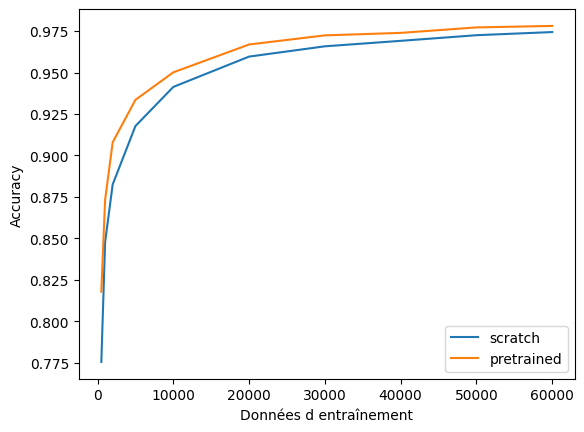

In [4]:
plt.plot(sizes,history['accuracy'],label="scratch")
plt.plot(sizes,history['pretrained_accuracy'],label="pretrained")
plt.xlabel('Données d entraînement')
plt.ylabel('Accuracy')
plt.legend()